<a id='back-to-top'></a>

---
#                                                     RNN Single-Variate analysis

---

# Load preprocessed MSFT stock data for one year (2014) and make short term (intraday) predictions.

----

Data: We have stock data for every minute during trading hours (09:30 to 16:00 EST). This is equivalent to 390 samples per day. We will use two months worth of stock data (~ 44 * 390 = 17160 samples) to train a multi-step RNN based network.

##  [Task:1 Use Stock close price](#RNN_Stock_Price)
     Using stock close price at one-min intervals, train the model to predict the stock prices on a short term hourly basis.
     
##  [Task:2 Use Stock returns (% gain or loss)](#RNN_Stock_Returns)
     Using stock returns at one-min intervals, train the model to predict the stock returns on a short term hourly basis.

##  [Task:3 Use Stock Up/Down Indicator](#RNN_Stock_UpDown)
     Using stock up/down indicator at one-min intervals, train the model to predict if stock will be up/down on a short term hourly basis.
     

In [5]:
import tensorflow as tf
import numpy as np
import os

print(tf.__version__)

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

1.7.0


[back-to-top](#back-to-top)
<a id='RNN_Stock_Price'></a>

##                                Task:1 Use Stock close price.
### Using stock close price, train the model to predict the stock prices for the next trading day on hourly basis.

In [6]:
import pandas as pd
import glob

path ='C:/cygwin64/home/mpatnam/CSCIE63/CSCI E-89 Deep Learning/Project/Processed'
stockfile = path + "/msft_stock.2014.csv"   # Load 2014 year data
stockdata = pd.read_csv(stockfile)

print('Total rows x columns:', stockdata.shape)
stockdata

Total rows x columns: (97701, 25)


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,...,DateTime,stock.CumReturn,etf.Open,etf.Close,etf.Return,etf.CumReturn,spy.Open,spy.Close,spy.Return,spy.CumReturn
0,20140102,930,33.6932,33.7383,33.6661,33.6842,1319510.0,1,0,0.0,...,2014-01-02 09:30:00,0.000000,33.2818,33.2164,-0.196504,0.000000,170.607,170.524,-0.048650,0.000000
1,20140102,931,33.6932,33.7293,33.6661,33.7157,206817.0,1,0,0.0,...,2014-01-02 09:31:00,0.093516,33.2164,33.2024,-0.042148,-0.042148,170.524,170.529,0.002932,0.002932
2,20140102,932,33.7112,33.7293,33.6030,33.6120,227216.0,1,0,0.0,...,2014-01-02 09:32:00,-0.214344,33.2071,33.2071,0.000000,-0.027998,170.524,170.589,0.038118,0.038118
3,20140102,933,33.6120,33.6300,33.5759,33.6120,170074.0,1,0,0.0,...,2014-01-02 09:33:00,-0.214344,33.2164,33.2118,-0.013849,-0.013849,170.580,170.598,0.010552,0.043396
4,20140102,934,33.6120,33.6391,33.6120,33.6300,48095.9,1,0,0.0,...,2014-01-02 09:34:00,-0.160906,33.2118,33.1891,-0.068349,-0.082188,170.598,170.515,-0.048652,-0.005278
5,20140102,935,33.6300,33.6481,33.6120,33.6327,61244.2,1,0,0.0,...,2014-01-02 09:35:00,-0.152891,33.1978,33.1884,-0.028315,-0.084296,170.524,170.459,-0.038118,-0.038118
6,20140102,936,33.6300,33.6481,33.6210,33.6210,24677.0,1,0,0.0,...,2014-01-02 09:36:00,-0.187625,33.1881,33.1791,-0.027118,-0.112294,170.450,170.320,-0.076269,-0.119631
7,20140102,937,33.6300,33.6526,33.6210,33.6481,120999.0,1,0,0.0,...,2014-01-02 09:37:00,-0.107172,33.1791,33.1976,0.055758,-0.056599,170.315,170.376,0.035816,-0.086791
8,20140102,938,33.6391,33.6481,33.6120,33.6481,112894.0,1,0,0.0,...,2014-01-02 09:38:00,-0.107172,33.1931,33.1791,-0.042177,-0.112294,170.367,170.236,-0.076893,-0.168891
9,20140102,939,33.6481,33.6481,33.6231,33.6300,50620.0,1,0,0.0,...,2014-01-02 09:39:00,-0.160906,33.1744,33.1510,-0.070536,-0.196891,170.236,170.153,-0.048756,-0.217565


In [7]:
#
# Understand dataset first
#

# print header columns
print('--------------------------------------------------------------')
print('Column datatypes:\n', stockdata.dtypes)
print('--------------------------------------------------------------')
print('2nd row:\n', stockdata.iloc[2])   # display 2nd row
print('--------------------------------------------------------------')
print('2nd row (from last):\n', stockdata.iloc[-2])   # display 2nd row from last
print('--------------------------------------------------------------')
print('StockData price column: ', stockdata.columns[5])
print('--------------------------------------------------------------')
print('Sample stock prices')
print(stockdata['Close'].head())  # this is the column of interest with temperature data

--------------------------------------------------------------
Column datatypes:
 Date                 int64
Time                 int64
Open               float64
High               float64
Low                float64
Close              float64
Volume             float64
SplitFactor          int64
Earnings             int64
Dividends          float64
stock.Return       float64
Gain               float64
Loss               float64
RSI                float64
DateTimeStr         object
DateTime            object
stock.CumReturn    float64
etf.Open           float64
etf.Close          float64
etf.Return         float64
etf.CumReturn      float64
spy.Open           float64
spy.Close          float64
spy.Return         float64
spy.CumReturn      float64
dtype: object
--------------------------------------------------------------
2nd row:
 Date                          20140102
Time                               932
Open                           33.7112
High                           33.7293


In [7]:
#
# Data wrangling: 
# 1. Convert Date and Time columns into pandas DateTime type
# 2. create index on date column for faster lookups
#

# convert text date values to concrete type
print("--------------------------------------------------------")
# convert market data volume to int 
stockdata['Volume'] = stockdata['Volume'].map(int)
# convert Date/Time columns into native datetime type
stockdata['DateTime'] = pd.to_datetime(stockdata['DateTime'].map(str), format="%Y-%m-%d %H:%M:%S")

# set DateTime as table index column
stockdata=stockdata.set_index(pd.DatetimeIndex(stockdata['DateTime']))
print(stockdata.dtypes)
stockdata

--------------------------------------------------------
Date                        int64
Time                        int64
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                      int64
SplitFactor                 int64
Earnings                    int64
Dividends                 float64
stock.Return              float64
Gain                      float64
Loss                      float64
RSI                       float64
DateTimeStr                object
DateTime           datetime64[ns]
stock.CumReturn           float64
etf.Open                  float64
etf.Close                 float64
etf.Return                float64
etf.CumReturn             float64
spy.Open                  float64
spy.Close                 float64
spy.Return                float64
spy.CumReturn             float64
dtype: object


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,...,DateTime,stock.CumReturn,etf.Open,etf.Close,etf.Return,etf.CumReturn,spy.Open,spy.Close,spy.Return,spy.CumReturn
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-01-02 09:30:00,20140102,930,33.6932,33.7383,33.6661,33.6842,1319510,1,0,0.0,...,2014-01-02 09:30:00,0.000000,33.2818,33.2164,-0.196504,0.000000,170.607,170.524,-0.048650,0.000000
2014-01-02 09:31:00,20140102,931,33.6932,33.7293,33.6661,33.7157,206817,1,0,0.0,...,2014-01-02 09:31:00,0.093516,33.2164,33.2024,-0.042148,-0.042148,170.524,170.529,0.002932,0.002932
2014-01-02 09:32:00,20140102,932,33.7112,33.7293,33.6030,33.6120,227216,1,0,0.0,...,2014-01-02 09:32:00,-0.214344,33.2071,33.2071,0.000000,-0.027998,170.524,170.589,0.038118,0.038118
2014-01-02 09:33:00,20140102,933,33.6120,33.6300,33.5759,33.6120,170074,1,0,0.0,...,2014-01-02 09:33:00,-0.214344,33.2164,33.2118,-0.013849,-0.013849,170.580,170.598,0.010552,0.043396
2014-01-02 09:34:00,20140102,934,33.6120,33.6391,33.6120,33.6300,48095,1,0,0.0,...,2014-01-02 09:34:00,-0.160906,33.2118,33.1891,-0.068349,-0.082188,170.598,170.515,-0.048652,-0.005278
2014-01-02 09:35:00,20140102,935,33.6300,33.6481,33.6120,33.6327,61244,1,0,0.0,...,2014-01-02 09:35:00,-0.152891,33.1978,33.1884,-0.028315,-0.084296,170.524,170.459,-0.038118,-0.038118
2014-01-02 09:36:00,20140102,936,33.6300,33.6481,33.6210,33.6210,24677,1,0,0.0,...,2014-01-02 09:36:00,-0.187625,33.1881,33.1791,-0.027118,-0.112294,170.450,170.320,-0.076269,-0.119631
2014-01-02 09:37:00,20140102,937,33.6300,33.6526,33.6210,33.6481,120999,1,0,0.0,...,2014-01-02 09:37:00,-0.107172,33.1791,33.1976,0.055758,-0.056599,170.315,170.376,0.035816,-0.086791
2014-01-02 09:38:00,20140102,938,33.6391,33.6481,33.6120,33.6481,112894,1,0,0.0,...,2014-01-02 09:38:00,-0.107172,33.1931,33.1791,-0.042177,-0.112294,170.367,170.236,-0.076893,-0.168891


In [12]:
stockdata_one_day=stockdata.loc[stockdata['DateTime'] < '2014-01-03 00:00:00']
print(stockdata_one_day.shape)
stockdata_one_day.head()

(390, 25)


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,...,DateTime,stock.CumReturn,etf.Open,etf.Close,etf.Return,etf.CumReturn,spy.Open,spy.Close,spy.Return,spy.CumReturn
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-01-02 09:30:00,20140102,930,33.6932,33.7383,33.6661,33.6842,1319510,1,0,0.0,...,2014-01-02 09:30:00,0.000000,33.2818,33.2164,-0.196504,0.000000,170.607,170.524,-0.048650,0.000000
2014-01-02 09:31:00,20140102,931,33.6932,33.7293,33.6661,33.7157,206817,1,0,0.0,...,2014-01-02 09:31:00,0.093516,33.2164,33.2024,-0.042148,-0.042148,170.524,170.529,0.002932,0.002932
2014-01-02 09:32:00,20140102,932,33.7112,33.7293,33.6030,33.6120,227216,1,0,0.0,...,2014-01-02 09:32:00,-0.214344,33.2071,33.2071,0.000000,-0.027998,170.524,170.589,0.038118,0.038118
2014-01-02 09:33:00,20140102,933,33.6120,33.6300,33.5759,33.6120,170074,1,0,0.0,...,2014-01-02 09:33:00,-0.214344,33.2164,33.2118,-0.013849,-0.013849,170.580,170.598,0.010552,0.043396
2014-01-02 09:34:00,20140102,934,33.6120,33.6391,33.6120,33.6300,48095,1,0,0.0,...,2014-01-02 09:34:00,-0.160906,33.2118,33.1891,-0.068349,-0.082188,170.598,170.515,-0.048652,-0.005278


In [13]:
stockdata_one_week=stockdata.loc[stockdata['DateTime'] < '2014-01-09 00:00:00']
print(stockdata_one_week.shape)
stockdata_one_week.head()

(1948, 25)


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,...,DateTime,stock.CumReturn,etf.Open,etf.Close,etf.Return,etf.CumReturn,spy.Open,spy.Close,spy.Return,spy.CumReturn
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-01-02 09:30:00,20140102,930,33.6932,33.7383,33.6661,33.6842,1319510,1,0,0.0,...,2014-01-02 09:30:00,0.000000,33.2818,33.2164,-0.196504,0.000000,170.607,170.524,-0.048650,0.000000
2014-01-02 09:31:00,20140102,931,33.6932,33.7293,33.6661,33.7157,206817,1,0,0.0,...,2014-01-02 09:31:00,0.093516,33.2164,33.2024,-0.042148,-0.042148,170.524,170.529,0.002932,0.002932
2014-01-02 09:32:00,20140102,932,33.7112,33.7293,33.6030,33.6120,227216,1,0,0.0,...,2014-01-02 09:32:00,-0.214344,33.2071,33.2071,0.000000,-0.027998,170.524,170.589,0.038118,0.038118
2014-01-02 09:33:00,20140102,933,33.6120,33.6300,33.5759,33.6120,170074,1,0,0.0,...,2014-01-02 09:33:00,-0.214344,33.2164,33.2118,-0.013849,-0.013849,170.580,170.598,0.010552,0.043396
2014-01-02 09:34:00,20140102,934,33.6120,33.6391,33.6120,33.6300,48095,1,0,0.0,...,2014-01-02 09:34:00,-0.160906,33.2118,33.1891,-0.068349,-0.082188,170.598,170.515,-0.048652,-0.005278


In [8]:
#
# set training and test periods
#
train_startdate='2014-01-01 00:00:00'  # train start-date
train_lastdate='2014-03-01 00:00:00'   # train end-date (2 months of trading data)
test_startdate=train_startdate         # same as train start-date
test_lastdate='2014-03-03 23:59:00'    # test end-date (extends beyond training date for short term predictions)
test_pred_start = pd.to_datetime('2014-03-03 09:30:00', format="%Y-%m-%d %H:%M:%S") # we will predict prices at one hour interval on this day

CLOSE_PRICE_COLUMN_NUM = stockdata.columns.get_loc('Close')   # column pos
RETURN_COLUMN_NUM = stockdata.columns.get_loc('stock.Return') # column pos

In [9]:
# Fetch stock samples into a numpy array (for training purpose)
print('train: [', train_startdate, ':', train_lastdate, ']')
print('test: [', test_startdate, ':', test_lastdate, ']')
prices = stockdata.loc[stockdata['DateTime'] < train_lastdate].values[:,CLOSE_PRICE_COLUMN_NUM].astype(float) # training purpose
print()

tmp = stockdata.loc[stockdata['DateTime'] < test_lastdate]                  # testing purpose
prices_test = tmp.loc[tmp['DateTime'] > test_startdate]
print(len(prices_test['DateTime']))
prices_test

train: [ 2014-01-01 00:00:00 : 2014-03-01 00:00:00 ]
test: [ 2014-01-01 00:00:00 : 2014-03-03 23:59:00 ]

16004


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,...,DateTime,stock.CumReturn,etf.Open,etf.Close,etf.Return,etf.CumReturn,spy.Open,spy.Close,spy.Return,spy.CumReturn
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-01-02 09:30:00,20140102,930,33.6932,33.7383,33.6661,33.6842,1319510,1,0,0.0,...,2014-01-02 09:30:00,0.000000,33.2818,33.2164,-0.196504,0.000000,170.607,170.524,-0.048650,0.000000
2014-01-02 09:31:00,20140102,931,33.6932,33.7293,33.6661,33.7157,206817,1,0,0.0,...,2014-01-02 09:31:00,0.093516,33.2164,33.2024,-0.042148,-0.042148,170.524,170.529,0.002932,0.002932
2014-01-02 09:32:00,20140102,932,33.7112,33.7293,33.6030,33.6120,227216,1,0,0.0,...,2014-01-02 09:32:00,-0.214344,33.2071,33.2071,0.000000,-0.027998,170.524,170.589,0.038118,0.038118
2014-01-02 09:33:00,20140102,933,33.6120,33.6300,33.5759,33.6120,170074,1,0,0.0,...,2014-01-02 09:33:00,-0.214344,33.2164,33.2118,-0.013849,-0.013849,170.580,170.598,0.010552,0.043396
2014-01-02 09:34:00,20140102,934,33.6120,33.6391,33.6120,33.6300,48095,1,0,0.0,...,2014-01-02 09:34:00,-0.160906,33.2118,33.1891,-0.068349,-0.082188,170.598,170.515,-0.048652,-0.005278
2014-01-02 09:35:00,20140102,935,33.6300,33.6481,33.6120,33.6327,61244,1,0,0.0,...,2014-01-02 09:35:00,-0.152891,33.1978,33.1884,-0.028315,-0.084296,170.524,170.459,-0.038118,-0.038118
2014-01-02 09:36:00,20140102,936,33.6300,33.6481,33.6210,33.6210,24677,1,0,0.0,...,2014-01-02 09:36:00,-0.187625,33.1881,33.1791,-0.027118,-0.112294,170.450,170.320,-0.076269,-0.119631
2014-01-02 09:37:00,20140102,937,33.6300,33.6526,33.6210,33.6481,120999,1,0,0.0,...,2014-01-02 09:37:00,-0.107172,33.1791,33.1976,0.055758,-0.056599,170.315,170.376,0.035816,-0.086791
2014-01-02 09:38:00,20140102,938,33.6391,33.6481,33.6120,33.6481,112894,1,0,0.0,...,2014-01-02 09:38:00,-0.107172,33.1931,33.1791,-0.042177,-0.112294,170.367,170.236,-0.076893,-0.168891


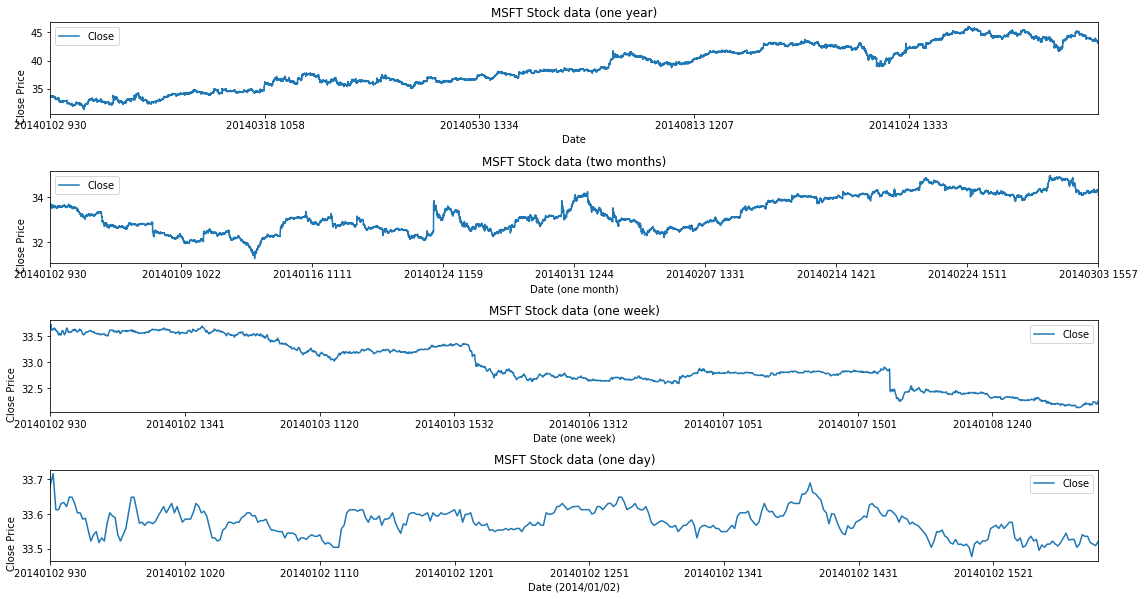

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

#
# plot stock prices for different time periods just to understand the pattern
#
# plot the stock prices for the entire data
plt.subplot(411)
stockdata.plot(x='DateTimeStr', y='Close', ax=plt.gca())
plt.xlabel("Date")
plt.ylabel("Close Price", horizontalalignment = 'right')
plt.title("MSFT Stock data (one year)")
plt.tight_layout()

# plot the prices for training period (two months)
plt.subplot(412)
prices_test.plot(x='DateTimeStr', y='Close', ax=plt.gca())
plt.xlabel("Date (one month)")
plt.ylabel("Close Price", horizontalalignment = 'right')
plt.title("MSFT Stock data (two months)")
plt.tight_layout()

# plot the prices for one week
plt.subplot(413)
stockdata_one_week.plot(x='DateTimeStr', y='Close', ax=plt.gca())
plt.xlabel("Date (one week)")
plt.ylabel("Close Price", horizontalalignment = 'right')
plt.title("MSFT Stock data (one week)")
plt.tight_layout()

# plot the price for one day
plt.subplot(414)
stockdata_one_day.plot(x='DateTimeStr', y='Close', ax=plt.gca())
plt.xlabel("Date (2014/01/02)")
plt.ylabel("Close Price", horizontalalignment = 'right')
plt.title("MSFT Stock data (one day)")

plt.show()

#### OBSERVATION: From the plot, it is clear that stock price varies widely regardless of how long the time period. Numerous factors that includes company's performance, sector overall performance, macro-economic trends, geo-political events affect stock prices in general.

In [12]:
#
# Next batch generation - 
# data: The original array of floating point data (normalized).
# batch_size: The number of samples per batch. We use randomization to identiy the start of each seq in the input data
#             in order to generate 'batch_size' sequences.
# n_steps: The period, in timesteps, at which we sample data.
# n_lag: How many timesteps in the future should our target be.
#
def next_batch(data, batch_size, n_steps, n_lag=1, debug=0):
    t_min, t_max = 0, len(data)
    t0 = np.random.randint(t_min, t_max - n_steps - n_lag, batch_size)
    Ts = np.array([np.arange(t, t + n_steps + n_lag) for t in t0])   # batch_size x (n_steps+n_lag) matrix of indices into data vector
    ys = np.array([data[t] for t in Ts])
    
    if (debug):
        print(t0)
        print(Ts.shape)
        print(Ts)        
        print(ys.shape)
        print(ys)
    return ys[:, :-n_lag].reshape(-1, n_steps, 1), ys[:, n_lag:].reshape(-1, n_steps, 1)

In [13]:
#
# Normalize the stock prices using mean/SD - 
#
prices_normal = prices.tolist()
mean = np.mean(prices)
std = np.std(prices)
print('mean:', round(mean, 5), ', std:', round(std, 5))

prices_normal -= mean
prices_normal /= std

print('Sample first few prices (raw):', prices[:5])   # first 5 values
print('Sample last few prices (raw):', prices[-5:])   # last 5 values
print('Sample first few prices (normalized):', prices_normal[:5])
print('Sample last few prices (normalized):', prices_normal[-5:])
print('Train data size: ', len(prices_normal))

mean: 33.23274 , std: 0.76691
Sample first few prices (raw): [33.6842 33.7157 33.612  33.612  33.63  ]
Sample last few prices (raw): [34.823  34.8002 34.7639 34.8184 34.8548]
Sample first few prices (normalized): [0.58867267 0.62974682 0.49452809 0.49452809 0.51799904]
Sample last few prices (normalized): [2.07360123 2.04387137 1.99653829 2.0676031  2.11506657]
Train data size:  15613


In [14]:
prices_test['CloseNormal'] = (prices_test['Close'] - mean)/std
prices_test

,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,...,etf.Open,etf.Close,etf.Return,etf.CumReturn,spy.Open,spy.Close,spy.Return,spy.CumReturn,stock.UpDownIndicator,CloseNormal
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-01-02 09:30:00,20140102,930,33.6932,33.7383,33.6661,33.6842,1319510,1,0,0.0,...,33.2818,33.2164,-0.196504,0.000000,170.607,170.524,-0.048650,0.000000,0,0.588673
2014-01-02 09:31:00,20140102,931,33.6932,33.7293,33.6661,33.7157,206817,1,0,0.0,...,33.2164,33.2024,-0.042148,-0.042148,170.524,170.529,0.002932,0.002932,1,0.629747
2014-01-02 09:32:00,20140102,932,33.7112,33.7293,33.6030,33.6120,227216,1,0,0.0,...,33.2071,33.2071,0.000000,-0.027998,170.524,170.589,0.038118,0.038118,0,0.494528
2014-01-02 09:33:00,20140102,933,33.6120,33.6300,33.5759,33.6120,170074,1,0,0.0,...,33.2164,33.2118,-0.013849,-0.013849,170.580,170.598,0.010552,0.043396,1,0.494528
2014-01-02 09:34:00,20140102,934,33.6120,33.6391,33.6120,33.6300,48095,1,0,0.0,...,33.2118,33.1891,-0.068349,-0.082188,170.598,170.515,-0.048652,-0.005278,1,0.517999
2014-01-02 09:35:00,20140102,935,33.6300,33.6481,33.6120,33.6327,61244,1,0,0.0,...,33.1978,33.1884,-0.028315,-0.084296,170.524,170.459,-0.038118,-0.038118,1,0.521520
2014-01-02 09:36:00,20140102,936,33.6300,33.6481,33.6210,33.6210,24677,1,0,0.0,...,33.1881,33.1791,-0.027118,-0.112294,170.450,170.320,-0.076269,-0.119631,0,0.506264
2014-01-02 09:37:00,20140102,937,33.6300,33.6526,33.6210,33.6481,120999,1,0,0.0,...,33.1791,33.1976,0.055758,-0.056599,170.315,170.376,0.035816,-0.086791,1,0.541600
2014-01-02 09:38:00,20140102,938,33.6391,33.6481,33.6120,33.6481,112894,1,0,0.0,...,33.1931,33.1791,-0.042177,-0.112294,170.367,170.236,-0.076893,-0.168891,1,0.541600


In [15]:
# Set the data batch generation parameters
n_days = 2                        # window of contiguous trading days
n_samples_hour = 60               # number of samples per hour (input: one-min samples)
n_samples_day = 6.5 * n_samples_hour # 09:30 to 16:00 EST trading hour window (6.5 hours)
n_steps = int(n_days * n_samples_day)
n_lag = 60                        # n_steps to predict into future (60 samples = 1 hour)
batch_size = 50

X_batch shape: (50, 780, 1)
y_batch shape: (50, 780, 1)
------------------------------


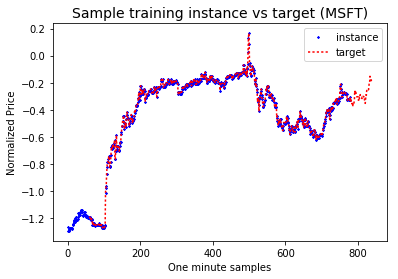

In [216]:
#
# Generate a sample instance and target for visualization purpose
#
import matplotlib.pyplot as plt

X_batch, y_batch=next_batch(prices_normal, batch_size, n_steps, n_lag)
print('X_batch shape:', X_batch.shape)
print('y_batch shape:', y_batch.shape)
print('------------------------------')

# Plot instance vs target values
# note that we cannot use DateTime column due to discontinuity of data (after market)
x_label=np.arange(0, n_steps+n_lag, 1).tolist()
plt.title("Sample training instance vs target (MSFT)", fontsize=14)
plt.plot(x_label[:n_steps], X_batch[0, :, 0], "b*", markersize=2, label="instance")
plt.plot(x_label[n_lag:n_steps+n_lag], y_batch[0, :, 0], "r:", markersize=2, label="target")
plt.legend(loc="upper right")
plt.xlabel("One minute samples")
plt.ylabel("Normalized Price")
plt.show()

In [210]:
#
# Define RNN model with multi-steps
#
# Model parameters:
#           Learning rate = 0.001
#           Cell type = RNN with OutputProjectionWrapper
#              #Input steps = 780 (Samples for 2 consecutive trading days - 2 * 390 =  780)
#              #Target steps = 780
#              #neurons/cell = 100
#           Output activation: relu function
#           Optimizer = Adam
#           Loss function = MSE (mean squared error)
#           Training #epochs = 800
#           Batchsize = 50
#
reset_graph()

# RNN time-step model parameters
n_inputs = 1
n_neurons = 100
n_outputs = 1

# define RNN cell with output projection to get single value out of #n_neurons by having a FC layer
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# add FC layer to convert output vector of size 100 into one output that corresponds to time_series(t)
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [211]:
# Training parameters
learning_rate = 0.001
n_iterations = 800

loss = tf.reduce_mean(tf.square(outputs - y)) # Loss function: MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [212]:
#
# Training phase for multi time-step RNN
#
import time

#
# We have a vector of time-series values, train to produce the desired output for 'n' steps into future.
# We intend to predict every hour for a one full day - trading window of 6.5 hours. This corresponds 
# to a lag of 60, 120, 180, 240, 300, 360 steps into future.
# y_batch[t] = X_batch[t+n_lag]
#
start_time = time.time()
lag_list = [60, 120, 180, 240, 300, 360]  # predicting stock prices next trading day at each hour interval (upto 6hours)
with tf.Session() as sess:
    init.run()
    for lag in lag_list:
        print("Training for Lag= ", lag)
        for iteration in range(n_iterations):
            X_batch, y_batch=next_batch(prices_normal, batch_size, n_steps, lag)        
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            if iteration % 100 == 0:
                mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
                print("\t", iteration, "\tMSE:", mse)
        print("Saving model weights for lag: ", lag)
        saver.save(sess, "./Proj_MSFT_time_series_1m_"+str(n_days)+"d_"+str(lag)) # not shown in the book
elapsed_time = time.time() - start_time
print("Total training time: ", round(elapsed_time, 2), "sec")

Training for Lag=  60
	 0 	MSE: 0.7363748
	 100 	MSE: 0.05171514
	 200 	MSE: 0.052399702
	 300 	MSE: 0.046565786
	 400 	MSE: 0.043943375
	 500 	MSE: 0.040743746
	 600 	MSE: 0.042733826
	 700 	MSE: 0.047164723
Saving model weights for lag:  60
Training for Lag=  120
	 0 	MSE: 0.09848139
	 100 	MSE: 0.084167756
	 200 	MSE: 0.085086614
	 300 	MSE: 0.09009637
	 400 	MSE: 0.08896421
	 500 	MSE: 0.07382988
	 600 	MSE: 0.07592509
	 700 	MSE: 0.08530672
Saving model weights for lag:  120
Training for Lag=  180
	 0 	MSE: 0.13831215
	 100 	MSE: 0.11726445
	 200 	MSE: 0.10886863
	 300 	MSE: 0.1288193
	 400 	MSE: 0.11602224
	 500 	MSE: 0.09154089
	 600 	MSE: 0.107022576
	 700 	MSE: 0.13906056
Saving model weights for lag:  180
Training for Lag=  240
	 0 	MSE: 0.184146
	 100 	MSE: 0.17483564
	 200 	MSE: 0.19544645
	 300 	MSE: 0.16567974
	 400 	MSE: 0.15240893
	 500 	MSE: 0.18156433
	 600 	MSE: 0.14481343
	 700 	MSE: 0.18146883
Saving model weights for lag:  240
Training for Lag=  300
	 0 	MSE: 0.22

In [135]:
#
# Predict multi time-steps into the future
# Lets predict stock prices for the last five days in the input sequence. We predict 60 steps at a time.
#
results = pd.DataFrame(columns=['n_lag', 'hour_idx', 'DateTime', 'loss(MSE)', 'Close(Actual)', 'Close(Pred)', 'loss_normal'])
sequence = prices_test['CloseNormal'].tolist()   # test input

print('#Test Prices(initial): ', len(sequence))
print('----------------------------------------------------------------------------------------')

lag_list = [60, 120, 180, 240, 300, 360]   # num of samples to predict into future
for hour_idx, lag in enumerate(lag_list):
    with tf.Session() as sess:
        print("Restore model with lag: ", lag)
        saver.restore(sess, "./Proj_MSFT_time_series_1m_"+str(n_days)+"d_"+str(lag))
        #
        # Collect predictions over the entire test period that stretches beyond the training period
        #
        pred_values = sequence[:n_steps]  # initialize first n_steps with original sequence values
        cum_mse = []
        for i in range(n_steps, len(sequence), lag):
            X_batch = np.array(sequence[i-n_steps:i]).reshape(1, n_steps, 1) # pick n_steps values from the sequence
            y_pred = sess.run(outputs, feed_dict={X: X_batch})               # predicted values are the last lag values
            y_pred_values=y_pred[0, -lag:, 0].tolist()                       # pick last lag values
            pred_values.extend([round(item, 6) for item in y_pred_values])   # accumulate predicted values

            mse = tf.reduce_mean(tf.square(y_pred - X_batch))                # calc MSE for test data
            cum_mse.append(mse.eval())
            print('\tX-batch[', i-n_steps, ':', i, '], MSE: ', round(mse.eval(), 4), ', y-batch[', i-n_steps+n_lag, ':', len(pred_values), ']')
        print('----------------------------------------------------------------------------------------')
        print('\t#Test Prices: ', len(sequence))
        print('\t#Predicted values: ', len(pred_values))

        # Add predicted prices to dataframe
        pred_col_name = 'ClosePred'+str(lag)
        seq = pd.Series(pred_values[:prices_test.shape[0]])
        prices_test[pred_col_name] = (seq.values*std) + mean
        
        # MSE calculation for pred values
        mse_normalized = round(np.mean(cum_mse), 4)
        print('\tMSE(normalized): ', mse_normalized)
        mse_price = round((mse_normalized*std + mean), 4)
        print('\tMSE(prices):', mse_price)    # MSE in terms of stock price

        # append to results dataframe
        datetime_lag = test_pred_start + pd.Timedelta(str(lag)+' min')
        actual_price_lag = prices_test[prices_test['DateTime']==datetime_lag]['Close'].values[0]      
        pred_price_lag = prices_test[prices_test['DateTime']==datetime_lag][pred_col_name].values[0]              
        print('\t', datetime_lag, 'Actual: ', actual_price_lag, 'Pred: ', pred_price_lag)
        results.loc[hour_idx] = [lag, hour_idx+1, datetime_lag, mse_price, actual_price_lag, pred_price_lag, mse_normalized]

#Test Prices(initial):  16004
----------------------------------------------------------------------------------------
Restore model with lag:  60
INFO:tensorflow:Restoring parameters from ./Proj_MSFT_time_series_1m_2d_60
	X-batch[ 0 : 780 ], MSE:  0.0028 , y-batch[ 60 : 840 ]
	X-batch[ 60 : 840 ], MSE:  0.0028 , y-batch[ 120 : 900 ]
	X-batch[ 120 : 900 ], MSE:  0.0028 , y-batch[ 180 : 960 ]
	X-batch[ 180 : 960 ], MSE:  0.0027 , y-batch[ 240 : 1020 ]
	X-batch[ 240 : 1020 ], MSE:  0.0027 , y-batch[ 300 : 1080 ]
	X-batch[ 300 : 1080 ], MSE:  0.0027 , y-batch[ 360 : 1140 ]
	X-batch[ 360 : 1140 ], MSE:  0.0026 , y-batch[ 420 : 1200 ]
	X-batch[ 420 : 1200 ], MSE:  0.0023 , y-batch[ 480 : 1260 ]
	X-batch[ 480 : 1260 ], MSE:  0.0019 , y-batch[ 540 : 1320 ]
	X-batch[ 540 : 1320 ], MSE:  0.0017 , y-batch[ 600 : 1380 ]
	X-batch[ 600 : 1380 ], MSE:  0.0015 , y-batch[ 660 : 1440 ]
	X-batch[ 660 : 1440 ], MSE:  0.0012 , y-batch[ 720 : 1500 ]
	X-batch[ 720 : 1500 ], MSE:  0.0008 , y-batch[ 780 : 156

In [59]:
# Predictions across different lags into future
prices_test[n_steps:][['DateTime', 'Close', 'CloseNormal', 'ClosePred60', 'ClosePred120', 'ClosePred180', 'ClosePred240', 'ClosePred300', 'ClosePred360']]    # print

,DateTime,Close,CloseNormal,ClosePred60,ClosePred120,ClosePred180,ClosePred240,ClosePred300,ClosePred360
DateTime,,,,,,,,,
2014-01-03 15:58:00,2014-01-03 15:58:00,33.3323,0.129816,33.332300,33.332300,33.332300,33.332300,33.332300,33.332300
2014-01-03 15:59:00,2014-01-03 15:59:00,33.3053,0.094609,33.305300,33.305300,33.305300,33.305300,33.305300,33.305300
2014-01-03 16:00:00,2014-01-03 16:00:00,33.2963,0.082874,33.296300,33.296300,33.296300,33.296300,33.296300,33.296300
2014-01-06 09:30:00,2014-01-06 09:30:00,33.2421,0.012200,33.242100,33.242100,33.242100,33.242100,33.242100,33.242100
2014-01-06 09:31:00,2014-01-06 09:31:00,33.2151,-0.023006,33.242911,33.036601,33.182840,33.196933,33.167691,33.356948
2014-01-06 09:32:00,2014-01-06 09:32:00,33.2015,-0.040740,33.238959,33.029034,33.175996,33.202140,33.164616,33.364200
2014-01-06 09:33:00,2014-01-06 09:33:00,33.2151,-0.023006,33.244015,33.035302,33.176467,33.236566,33.172159,33.397042
2014-01-06 09:34:00,2014-01-06 09:34:00,33.1880,-0.058343,33.241417,33.033588,33.182845,33.247944,33.178877,33.389910
2014-01-06 09:35:00,2014-01-06 09:35:00,33.1069,-0.164093,33.246895,33.033016,33.186113,33.224937,33.173734,33.382709


In [136]:
# display predicted results at each hour
results

,n_lag,hour_idx,DateTime,loss(MSE),Close(Actual),Close(Pred),loss_normal
0,60.0,1.0,2014-03-03 10:30:00,33.2337,34.3095,34.622044,0.0012
1,120.0,2.0,2014-03-03 11:30:00,33.2375,34.1731,34.616619,0.0062
2,180.0,3.0,2014-03-03 12:30:00,33.2418,34.1731,34.558906,0.0118
3,240.0,4.0,2014-03-03 13:30:00,33.2505,34.2185,34.505930,0.0232
4,300.0,5.0,2014-03-03 14:30:00,33.2630,34.2186,34.561902,0.0394
5,360.0,6.0,2014-03-03 15:30:00,33.2693,34.2299,34.473164,0.0477


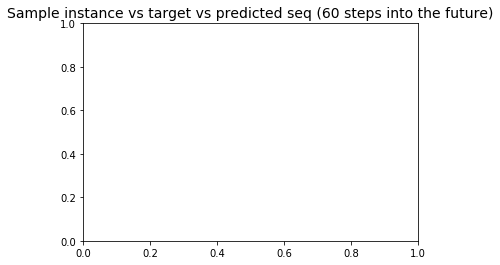

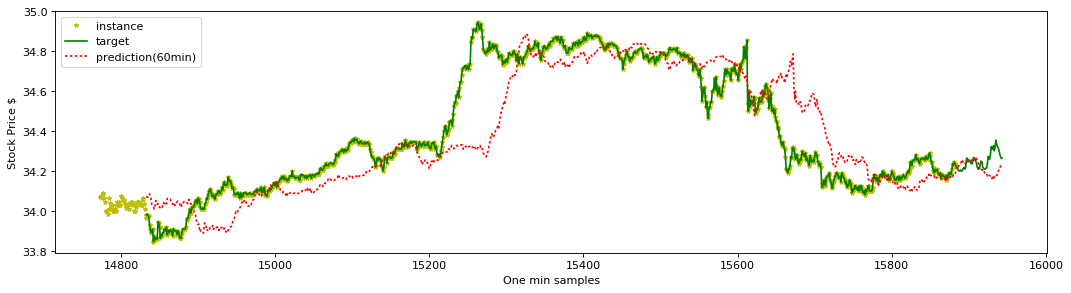

In [222]:
import matplotlib.pyplot as plt

# Plot instance vs target vs predicted values  (for 60min into future)
# Print for an approximate time window of last 5 days of the month
lag=60
start=len(prices_normal)-n_steps   # last 5 days of the month
x_label=np.arange(0, len(prices_test['Close']), 1).tolist()

plt.title("Sample instance vs target vs predicted seq (60 steps into the future)", fontsize=14)
plt.figure(figsize=(16,4), dpi=80)
plt.plot(x_label[start-lag:-2*lag], prices_test['Close'][start-lag:-2*lag], "y*", markersize=4, label="instance")
plt.plot(x_label[start:-lag], prices_test['Close'][start:-lag], "g-", markersize=1, label="target")
plt.plot(x_label[start:-lag], prices_test['ClosePred60'][start:-lag], "r:", markersize=2, label="prediction(60min)")

plt.legend(loc="upper left")
plt.xlabel("One min samples")
plt.ylabel("Stock Price $")
plt.show()

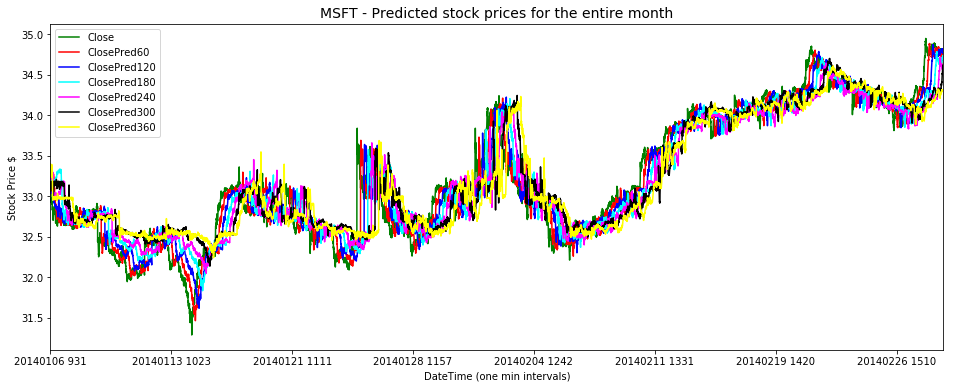

In [224]:
plt.figure(figsize=(16,6))
plt.subplot(111)
lag=450                            # skip last batch of values across to have same time frame for all predictions.
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='Close', color='green', ax=plt.gca())   # Actual close prices
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred60', color='red', ax=plt.gca())
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred120', color='blue', ax=plt.gca())
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred180', color='cyan', ax=plt.gca())
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred240', color='magenta', ax=plt.gca())
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred300', color='black', ax=plt.gca())
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred360', color='yellow', ax=plt.gca())
plt.title("MSFT - Predicted stock prices for the entire month", fontsize=14)
plt.xlabel("DateTime (one min intervals)")
plt.ylabel("Stock Price $")
plt.show()

## OBSERVATION: 
1. We see that the predictions here are much worse as the prediction window grows. We do see that the predictions have picked-up for short term (60min window) and overall, picked up the long-term patterns. 
2. We are using #steps equivalent to 2 days worth of trading data. From the experiment with XLK, we have observed that there is not much improvement with increasing #steps to 5 days worth of trading data (see XLK-RLK-single-variate-5days.ipynb).

[back-to-top](#back-to-top)
<a id='RNN_Stock_Returns'></a>

## Task:2 Use Stock returns (% gain or loss).
#### Using stock returns, train the model using 2 month data to predict the stock returns on a short term basis. We will predict multiple values on an hourly basis outside the training period.

In [183]:
#
# Use one-min returns to train the model
#
returns = stockdata.loc[stockdata['DateTime'] < train_lastdate].values[:,RETURN_COLUMN_NUM].astype(float) # training purpose
returns_normal = returns.tolist()
mean_ret = np.mean(returns)
std_ret = np.std(returns)
print('mean:', round(mean_ret, 5), ', std:', round(std_ret, 5))

returns_normal -= mean_ret
returns_normal /= std_ret

prices_test['stock.ReturnNormal'] = (prices_test['stock.Return'] - mean_ret)/std_ret
prices_test[['stock.Return', 'stock.ReturnNormal']]

mean: -0.00043 , std: 0.05971


,stock.Return,stock.ReturnNormal
DateTime,,
2014-01-02 09:30:00,-0.026712,-0.440180
2014-01-02 09:31:00,0.066779,1.125690
2014-01-02 09:32:00,-0.294264,-4.921403
2014-01-02 09:33:00,0.000000,0.007212
2014-01-02 09:34:00,0.053552,0.904156
2014-01-02 09:35:00,0.008029,0.141681
2014-01-02 09:36:00,-0.026762,-0.441021
2014-01-02 09:37:00,0.053821,0.908656
2014-01-02 09:38:00,0.026755,0.455323


In [64]:
#
# Define RNN model with multi-steps
#
reset_graph()

# RNN time-step model parameters
n_inputs = 1
n_neurons = 100
n_outputs = 1

# define RNN cell with output projection to get single value out of #n_neurons by having a FC layer
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# add FC layer to convert output vector of size 100 into one output that corresponds to time_series(t)
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [70]:
#
# Training phase for multi time-step RNN
#
import time

n_iterations = 800
#
# We have a vector of time-series values, train to produce the desired output for 'n' steps into future.
# We intend to predict every hour for a one full day - trading window of 6.5 hours. This corresponds 
# to a lag of 60, 120, 180, 240, 300, 360 steps into future.
# y_batch[t] = X_batch[t+n_lag]
#
start_time = time.time()
lag_list = [60, 120, 180, 240, 300, 360]  # predicting stock returns at each hour interval (upto 6hours)
with tf.Session() as sess:
    init.run()
    for lag in lag_list:
        print("Training for Lag= ", lag)
        for iteration in range(n_iterations):
            X_batch, y_batch=next_batch(returns_normal, batch_size, n_steps, lag)        
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            if iteration % 100 == 0:
                mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
                print("\t", iteration, "\tMSE:", mse)
        print("Saving model weights for lag: ", lag)
        saver.save(sess, "./Proj_MSFT_returns_1m_"+str(n_days)+"d_"+str(lag)) # not shown in the book
elapsed_time = time.time() - start_time
print("Total training time: ", round(elapsed_time, 2), "sec")

Training for Lag=  60
	 0 	MSE: 0.9495059
	 100 	MSE: 0.9489427
	 200 	MSE: 0.73516494
	 300 	MSE: 0.6963615
	 400 	MSE: 0.7537848
	 500 	MSE: 0.6544651
	 600 	MSE: 0.6387908
	 700 	MSE: 0.62334543
Saving model weights for lag:  60
Training for Lag=  120
	 0 	MSE: 1.3654504
	 100 	MSE: 0.9759403
	 200 	MSE: 1.0435697
	 300 	MSE: 0.9597129
	 400 	MSE: 0.9954453
	 500 	MSE: 1.0266719
	 600 	MSE: 0.8128001
	 700 	MSE: 0.81444603
Saving model weights for lag:  120
Training for Lag=  180
	 0 	MSE: 1.1427897
	 100 	MSE: 0.9873686
	 200 	MSE: 0.87677604
	 300 	MSE: 0.92197216
	 400 	MSE: 0.7824471
	 500 	MSE: 0.75077856
	 600 	MSE: 0.7059044
	 700 	MSE: 0.7382939
Saving model weights for lag:  180
Training for Lag=  240
	 0 	MSE: 1.3111365
	 100 	MSE: 0.9471651
	 200 	MSE: 0.89032114
	 300 	MSE: 0.9788389
	 400 	MSE: 0.86367786
	 500 	MSE: 0.6991853
	 600 	MSE: 0.7687287
	 700 	MSE: 0.70238394
Saving model weights for lag:  240
Training for Lag=  300
	 0 	MSE: 1.0586054
	 100 	MSE: 1.0340484


In [137]:
#
# Predict multi time-steps into the future
# Lets predict stock returns for the entire test period and into the future.
#
results = pd.DataFrame(columns=['n_lag', 'hour_idx', 'DateTime', 'loss(MSE)', 'Return(Actual)', 'Return(Pred)', 'loss_normal'])
sequence = prices_test['stock.ReturnNormal'].tolist()   # test input

print('#Test returns(initial): ', len(sequence))
print('----------------------------------------------------------------------------------------')

lag_list = [60, 120, 180, 240, 300, 360]   # num of samples to predict into future
for hour_idx, lag in enumerate(lag_list):
    with tf.Session() as sess:
        print("Restore model with lag: ", lag)
        saver.restore(sess, "./Proj_MSFT_returns_1m_"+str(n_days)+"d_"+str(lag))
        #
        # Collect predictions over the entire test period that stretches beyond the training period
        #
        pred_values = sequence[:n_steps]  # initialize first n_steps with original sequence values
        cum_mse = []
        for i in range(n_steps, len(sequence), lag):
            X_batch = np.array(sequence[i-n_steps:i]).reshape(1, n_steps, 1) # pick n_steps values from the sequence
            y_pred = sess.run(outputs, feed_dict={X: X_batch})               # predicted values are the last lag values
            y_pred_values=y_pred[0, -lag:, 0].tolist()                       # pick last lag values
            pred_values.extend([round(item, 6) for item in y_pred_values])   # accumulate predicted values

            mse = tf.reduce_mean(tf.square(y_pred - X_batch))                # calc loss MSE 
            cum_mse.append(mse.eval())
            print('\tX-batch[', i-n_steps, ':', i, '], MSE: ', round(mse.eval(), 4), ', y-batch[', i-n_steps+n_lag, ':', len(pred_values), ']')
        print('----------------------------------------------------------------------------------------')
        print('\t#Test returns: ', len(sequence))
        print('\t#Predicted values: ', len(pred_values))

        # Add predicted returns to the dataframe
        pred_col_name = 'ReturnPred'+str(lag)
        seq = pd.Series(pred_values[:prices_test.shape[0]])
        prices_test[pred_col_name] = (seq.values*std_ret) + mean_ret
        
        # MSE calculation for pred values
        mse_normalized = round(np.mean(cum_mse), 4)
        print('\tMSE(normalized): ', mse_normalized)
        mse_return = round((mse_normalized*std_ret + mean_ret), 4)
        print('\tMSE(return):', mse_return)    # MSE in terms of stock return

        # append to results dataframe
        datetime_lag = test_pred_start + pd.Timedelta(str(lag)+' min')
        actual_return_lag = prices_test[prices_test['DateTime']==datetime_lag]['stock.Return'].values[0]      
        pred_return_lag = prices_test[prices_test['DateTime']==datetime_lag][pred_col_name].values[0]              
        print('\t', datetime_lag, 'Actual: ', actual_return_lag, 'Pred: ', pred_return_lag)
        results.loc[hour_idx] = [lag, hour_idx+1, datetime_lag, mse_return, actual_return_lag, pred_return_lag, mse_normalized]

#Test returns(initial):  16004
----------------------------------------------------------------------------------------
Restore model with lag:  60
INFO:tensorflow:Restoring parameters from ./Proj_MSFT_returns_1m_2d_60
	X-batch[ 0 : 780 ], MSE:  0.7263 , y-batch[ 60 : 840 ]
	X-batch[ 60 : 840 ], MSE:  0.8075 , y-batch[ 120 : 900 ]
	X-batch[ 120 : 900 ], MSE:  0.8809 , y-batch[ 180 : 960 ]
	X-batch[ 180 : 960 ], MSE:  0.8809 , y-batch[ 240 : 1020 ]
	X-batch[ 240 : 1020 ], MSE:  0.8946 , y-batch[ 300 : 1080 ]
	X-batch[ 300 : 1080 ], MSE:  0.8648 , y-batch[ 360 : 1140 ]
	X-batch[ 360 : 1140 ], MSE:  0.852 , y-batch[ 420 : 1200 ]
	X-batch[ 420 : 1200 ], MSE:  0.8684 , y-batch[ 480 : 1260 ]
	X-batch[ 480 : 1260 ], MSE:  0.8363 , y-batch[ 540 : 1320 ]
	X-batch[ 540 : 1320 ], MSE:  0.7849 , y-batch[ 600 : 1380 ]
	X-batch[ 600 : 1380 ], MSE:  0.7731 , y-batch[ 660 : 1440 ]
	X-batch[ 660 : 1440 ], MSE:  0.7635 , y-batch[ 720 : 1500 ]
	X-batch[ 720 : 1500 ], MSE:  0.7564 , y-batch[ 780 : 1560 ]


In [158]:
# Display predicted results into the future (outside of training period)
results

,n_lag,hour_idx,DateTime,loss(MSE),Return(Actual),Return(Pred),loss_normal
0,60.0,1.0,2014-03-03 10:30:00,0.0817,-0.013114,-0.099755,1.3755
1,120.0,2.0,2014-03-03 11:30:00,0.0690,0.026636,0.064145,1.1628
2,180.0,3.0,2014-03-03 12:30:00,0.0749,0.000000,0.004021,1.2622
3,240.0,4.0,2014-03-03 13:30:00,0.0773,-0.079426,-0.010672,1.3025
4,300.0,5.0,2014-03-03 14:30:00,0.0795,0.053216,-0.075354,1.3391
5,360.0,6.0,2014-03-03 15:30:00,0.0824,-0.099521,-0.034892,1.3875


In [92]:
prices_test[n_steps:][['DateTime', 'stock.Return', 'stock.ReturnNormal', 'ReturnPred60', 'ReturnPred120', 'ReturnPred180', 'ReturnPred240', 'ReturnPred300', 'ReturnPred360']]    # print

,DateTime,stock.Return,stock.ReturnNormal,ReturnPred60,ReturnPred120,ReturnPred180,ReturnPred240,ReturnPred300,ReturnPred360
DateTime,,,,,,,,,
2014-01-06 09:31:00,2014-01-06 09:31:00,-0.083927,-1.398484,-0.013503,-0.011847,-0.023297,0.004405,0.004891,-0.012725
2014-01-06 09:32:00,2014-01-06 09:32:00,-0.027401,-0.451724,-0.009089,0.011176,0.009483,0.007524,0.016508,-0.017545
2014-01-06 09:33:00,2014-01-06 09:33:00,0.027103,0.461166,0.000874,-0.017829,-0.019089,0.033005,0.020141,-0.026737
2014-01-06 09:34:00,2014-01-06 09:34:00,-0.054508,-0.905741,-0.004042,0.004346,-0.009886,-0.007891,-0.063513,-0.050963
2014-01-06 09:35:00,2014-01-06 09:35:00,-0.271410,-4.538620,-0.052862,0.002305,-0.049517,-0.147578,-0.069529,-0.032667
2014-01-06 09:36:00,2014-01-06 09:36:00,0.041068,0.695057,0.011572,-0.020450,0.009102,-0.035028,0.062246,0.014383
2014-01-06 09:37:00,2014-01-06 09:37:00,0.027170,0.462279,0.001667,-0.004547,-0.005105,-0.031677,-0.050255,-0.012409
2014-01-06 09:38:00,2014-01-06 09:38:00,0.027163,0.462155,-0.024891,-0.012789,-0.042335,0.007605,0.047950,-0.043466
2014-01-06 09:39:00,2014-01-06 09:39:00,-0.000302,0.002158,0.029168,0.040804,0.049850,0.028137,-0.033927,-0.053166


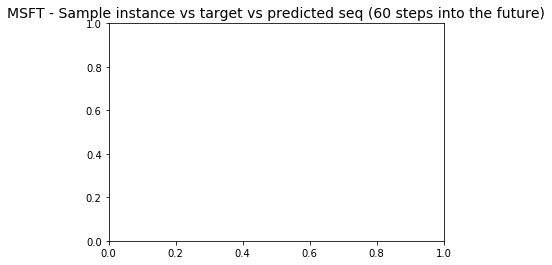

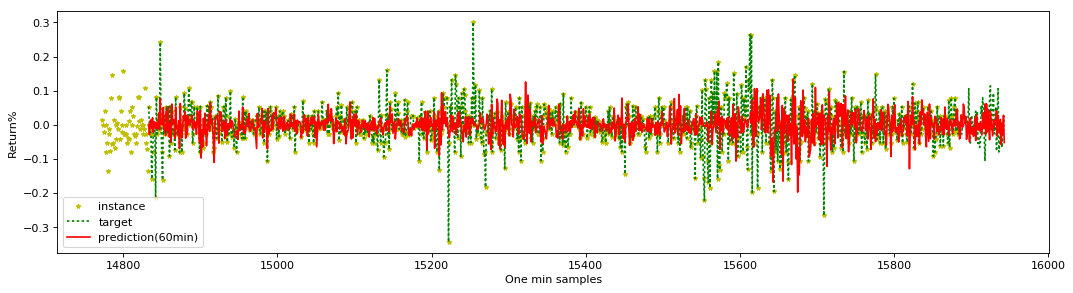

In [220]:
import matplotlib.pyplot as plt

# Plot instance vs target vs predicted values  (for 60min into future)
# Print for an approximate time window of last 5 days of the month
lag=60
start=len(returns_normal)-n_steps   # last 5 days of the month
x_label=np.arange(0, len(prices_test['stock.Return']), 1).tolist()

plt.title("MSFT - Sample instance vs target vs predicted seq (60 steps into the future)", fontsize=14)
plt.figure(figsize=(16,4), dpi=80)
plt.plot(x_label[start-lag:-2*lag], prices_test['stock.Return'][start-lag:-2*lag], "y*", markersize=4, label="instance")
plt.plot(x_label[start:-lag], prices_test['stock.Return'][start:-lag], "g:", markersize=1, label="target")
plt.plot(x_label[start:-lag], prices_test['ReturnPred60'][start:-lag], "r-", markersize=2, label="prediction(60min)")

plt.legend(loc="lower left")
plt.xlabel("One min samples")
plt.ylabel("Return%")
plt.show()

### OBSERVATION: 
1. The prediction of "stock" one-min returns is worse than prediction of stock prices, as seen in the previous experiment. Normalized loss as measured by MSE of returns (see results table above) is also worse. 

[back-to-top](#back-to-top)
<a id='RNN_Stock_UpDown'></a>

## Task:3 Use Stock Up/Down Indicator.
#### 1. We will predict on a logistic basis whether stock prices will be up or down using the 2 month training data. We will predict multiple times on an hourly basis outside the training period. 
#### 2. We already calculated single minute returns during pre-processing stage. We will simply use it to decide if stock went up (return >= 0) or down (return < 0).

In [10]:
# add stock up or down indicator column
prices_test['stock.UpDownIndicator']=(prices_test['stock.Return']>=0).astype(int)
updown = prices_test['stock.UpDownIndicator'].values
prices_test[['stock.Return', 'stock.UpDownIndicator']]

,stock.Return,stock.UpDownIndicator
DateTime,,
2014-01-02 09:30:00,-0.026712,0
2014-01-02 09:31:00,0.066779,1
2014-01-02 09:32:00,-0.294264,0
2014-01-02 09:33:00,0.000000,1
2014-01-02 09:34:00,0.053552,1
2014-01-02 09:35:00,0.008029,1
2014-01-02 09:36:00,-0.026762,0
2014-01-02 09:37:00,0.053821,1
2014-01-02 09:38:00,0.026755,1


In [16]:
#
# Define RNN model with multi-steps
#
reset_graph()

# RNN time-step model parameters
n_inputs = 1
n_neurons = 100
n_outputs = 1

# define RNN cell with output projection to get single value out of #n_neurons by having a FC layer
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# add FC layer to convert output vector of size 100 into one output that corresponds to time_series(t)
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

Instructions for updating:
Use the retry module or similar alternatives.


In [18]:
# Training parameters
learning_rate = 0.001
n_iterations = 800

loss = tf.reduce_mean(tf.square(outputs - y)) # Loss function: MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [193]:
#
# Training phase for multi time-step RNN
#
import time

n_iterations = 800
#
# We have a vector of time-series values, train to produce the desired output for 'n' steps into future.
# We intend to predict every hour for a one full day - trading window of 6.5 hours. This corresponds 
# to a lag of 60, 120, 180, 240, 300, 360 steps into future.
# y_batch[t] = X_batch[t+n_lag]
#
start_time = time.time()
lag_list = [60, 120, 180, 240, 300, 360]  # predicting whether stock prices will be up/down at hourly intervals 
with tf.Session() as sess:
    init.run()
    for lag in lag_list:
        print("Training for Lag= ", lag)
        for iteration in range(n_iterations):
            X_batch, y_batch=next_batch(updown, batch_size, n_steps, lag)        
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            if iteration % 100 == 0:
                mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
                print("\t", iteration, "\tMSE:", mse)
        print("Saving model weights for lag: ", lag)
        saver.save(sess, "./Proj_MSFT_updown_1m_"+str(n_days)+"d_"+str(lag)) # not shown in the book
elapsed_time = time.time() - start_time
print("Total training time: ", round(elapsed_time, 2), "sec")

Training for Lag=  60
	 0 	MSE: 0.53467673
	 100 	MSE: 0.24599327
	 200 	MSE: 0.24524039
	 300 	MSE: 0.24419527
	 400 	MSE: 0.24300666
	 500 	MSE: 0.2394709
	 600 	MSE: 0.23233841
	 700 	MSE: 0.22243455
Saving model weights for lag:  60
Training for Lag=  120
	 0 	MSE: 0.2665217
	 100 	MSE: 0.2419027
	 200 	MSE: 0.23511694
	 300 	MSE: 0.2311453
	 400 	MSE: 0.22418554
	 500 	MSE: 0.22292413
	 600 	MSE: 0.21438771
	 700 	MSE: 0.21621259
Saving model weights for lag:  120
Training for Lag=  180
	 0 	MSE: 0.27192664
	 100 	MSE: 0.24415417
	 200 	MSE: 0.24202068
	 300 	MSE: 0.24050497
	 400 	MSE: 0.23826715
	 500 	MSE: 0.23498265
	 600 	MSE: 0.23322348
	 700 	MSE: 0.2273739
Saving model weights for lag:  180
Training for Lag=  240
	 0 	MSE: 0.25982863
	 100 	MSE: 0.24284238
	 200 	MSE: 0.2402205
	 300 	MSE: 0.23426503
	 400 	MSE: 0.23124172
	 500 	MSE: 0.22798808
	 600 	MSE: 0.23274978
	 700 	MSE: 0.21824239
Saving model weights for lag:  240
Training for Lag=  300
	 0 	MSE: 0.27259532
	 10

In [205]:
#
# Predict multi time-steps into the future
# Lets predict stock up/down for the entire test period and into the future.
#
results = pd.DataFrame(columns=['n_lag', 'hour_idx', 'DateTime', 'UpDown(Actual)', 'UpDown(Pred)', 'loss_normal'])
sequence = prices_test['stock.UpDownIndicator'].tolist()   # test input

print('#Test updown list(initial): ', len(sequence))
print('----------------------------------------------------------------------------------------')

lag_list = [60, 120, 180, 240, 300, 360]   # num of samples to predict into future
for hour_idx, lag in enumerate(lag_list):
    with tf.Session() as sess:
        print("Restore model with lag: ", lag)
        saver.restore(sess, "./Proj_MSFT_updown_1m_"+str(n_days)+"d_"+str(lag))
        #
        # Collect predictions over the entire test period that stretches beyond the training period
        #
        pred_values = sequence[:n_steps]  # initialize first n_steps with original sequence values
        cum_mse = []
        for i in range(n_steps, len(sequence), lag):
            X_batch = np.array(sequence[i-n_steps:i]).reshape(1, n_steps, 1) # pick n_steps values from the sequence
            y_pred = sess.run(outputs, feed_dict={X: X_batch})               # predicted values are the last lag values
            y_pred_values=y_pred[0, -lag:, 0].tolist()                       # pick last lag values
            pred_values.extend([round(item, 3) for item in y_pred_values])   # accumulate predicted values

            mse = tf.reduce_mean(tf.square(y_pred - X_batch))                # calc loss MSE
            cum_mse.append(mse.eval())
            print('\tX-batch[', i-n_steps, ':', i, '], MSE: ', round(mse.eval(), 4), ', y-batch[', i-n_steps+n_lag, ':', len(pred_values), ']')
        print('----------------------------------------------------------------------------------------')
        print('\t#Test updown list: ', len(sequence))
        print('\t#Predicted values: ', len(pred_values))

        # Add predicted updown indicators to the dataframe
        pred_col_name = 'UpDownPred'+str(lag)
        seq = pd.Series(pred_values[:prices_test.shape[0]])
        prices_test[pred_col_name] = seq.values
        
        # MSE calculation for pred values
        loss_mse = round(np.mean(cum_mse), 4)
        print('\tMSE(loss): ', loss_mse)

        # append to results dataframe
        datetime_lag = test_pred_start + pd.Timedelta(str(lag)+' min')
        actual_updown_lag = prices_test[prices_test['DateTime']==datetime_lag]['stock.UpDownIndicator'].values[0]      
        pred_updown_lag = prices_test[prices_test['DateTime']==datetime_lag][pred_col_name].values[0]              
        print('\t', datetime_lag, 'Actual: ', actual_updown_lag, 'Pred: ', pred_updown_lag)
        results.loc[hour_idx] = [lag, hour_idx+1, datetime_lag, actual_updown_lag, pred_updown_lag, loss_mse]

#Test updown list(initial):  16004
----------------------------------------------------------------------------------------
Restore model with lag:  60
INFO:tensorflow:Restoring parameters from ./Proj_MSFT_updown_1m_2d_60
	X-batch[ 0 : 780 ], MSE:  0.2619 , y-batch[ 60 : 840 ]
	X-batch[ 60 : 840 ], MSE:  0.2629 , y-batch[ 120 : 900 ]
	X-batch[ 120 : 900 ], MSE:  0.2632 , y-batch[ 180 : 960 ]
	X-batch[ 180 : 960 ], MSE:  0.2625 , y-batch[ 240 : 1020 ]
	X-batch[ 240 : 1020 ], MSE:  0.2586 , y-batch[ 300 : 1080 ]
	X-batch[ 300 : 1080 ], MSE:  0.2553 , y-batch[ 360 : 1140 ]
	X-batch[ 360 : 1140 ], MSE:  0.2529 , y-batch[ 420 : 1200 ]
	X-batch[ 420 : 1200 ], MSE:  0.258 , y-batch[ 480 : 1260 ]
	X-batch[ 480 : 1260 ], MSE:  0.2561 , y-batch[ 540 : 1320 ]
	X-batch[ 540 : 1320 ], MSE:  0.2524 , y-batch[ 600 : 1380 ]
	X-batch[ 600 : 1380 ], MSE:  0.2493 , y-batch[ 660 : 1440 ]
	X-batch[ 660 : 1440 ], MSE:  0.2513 , y-batch[ 720 : 1500 ]
	X-batch[ 720 : 1500 ], MSE:  0.2504 , y-batch[ 780 : 1560

In [207]:
# Display predicted results into the future (outside of training period)
results

,n_lag,hour_idx,DateTime,UpDown(Actual),UpDown(Pred),loss_normal
0,60.0,1.0,2014-03-03 10:30:00,0.0,0.575,0.2651
1,120.0,2.0,2014-03-03 11:30:00,1.0,0.796,0.2711
2,180.0,3.0,2014-03-03 12:30:00,1.0,0.599,0.2617
3,240.0,4.0,2014-03-03 13:30:00,0.0,0.697,0.2725
4,300.0,5.0,2014-03-03 14:30:00,1.0,0.644,0.2747
5,360.0,6.0,2014-03-03 15:30:00,0.0,0.676,0.2691


In [208]:
prices_test[n_steps:][['DateTime', 'stock.UpDownIndicator', 'UpDownPred60', 'UpDownPred120', 'UpDownPred180', 'UpDownPred240', 'UpDownPred300', 'UpDownPred360']]    # print

,DateTime,stock.UpDownIndicator,UpDownPred60,UpDownPred120,UpDownPred180,UpDownPred240,UpDownPred300,UpDownPred360
DateTime,,,,,,,,
2014-01-06 09:31:00,2014-01-06 09:31:00,0,0.530,0.535,0.596,0.520,0.620,0.498
2014-01-06 09:32:00,2014-01-06 09:32:00,0,0.703,0.425,0.442,0.463,0.607,0.638
2014-01-06 09:33:00,2014-01-06 09:33:00,1,0.482,0.542,0.617,0.521,0.452,0.435
2014-01-06 09:34:00,2014-01-06 09:34:00,0,0.764,0.339,0.392,0.549,0.551,0.480
2014-01-06 09:35:00,2014-01-06 09:35:00,0,0.556,0.600,0.345,0.693,0.535,0.575
2014-01-06 09:36:00,2014-01-06 09:36:00,1,0.786,0.420,0.474,0.563,0.587,0.501
2014-01-06 09:37:00,2014-01-06 09:37:00,1,0.589,0.601,0.506,0.645,0.685,0.706
2014-01-06 09:38:00,2014-01-06 09:38:00,1,0.560,0.562,0.650,0.395,0.576,0.576
2014-01-06 09:39:00,2014-01-06 09:39:00,0,0.529,0.541,0.624,0.613,0.529,0.399


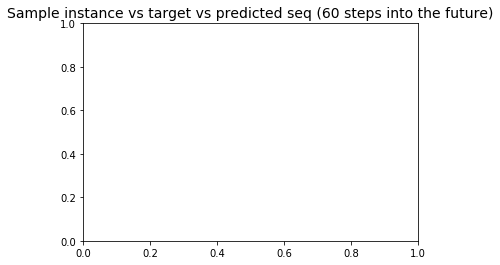

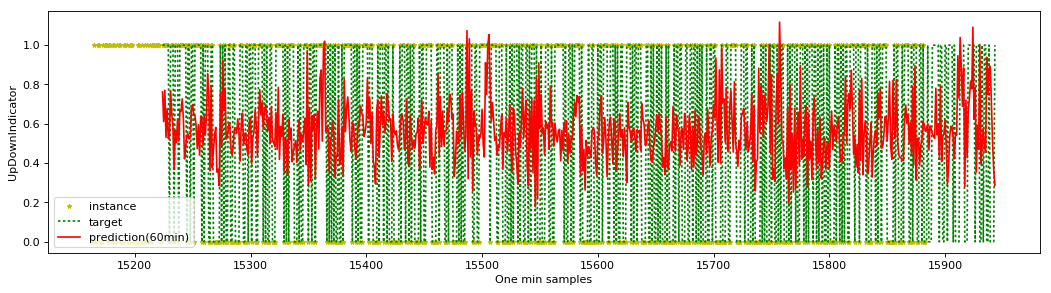

In [218]:
import matplotlib.pyplot as plt

# Plot instance vs target vs predicted values  (for 60min into future)
# Print for an approximate time window of last 5 days of the month
lag=60
start=len(updown)-n_steps   # last 5 days of the month
x_label=np.arange(0, len(prices_test['stock.UpDownIndicator']), 1).tolist()

plt.title("Sample instance vs target vs predicted seq (60 steps into the future)", fontsize=14)
plt.figure(figsize=(16,4), dpi=80)
plt.plot(x_label[start-lag:-2*lag], prices_test['stock.UpDownIndicator'][start-lag:-2*lag], "y*", markersize=4, label="instance")
plt.plot(x_label[start:-lag], prices_test['stock.UpDownIndicator'][start:-lag], "g:", markersize=1, label="target")
plt.plot(x_label[start:-lag], prices_test['UpDownPred60'][start:-lag], "r-", markersize=2, label="prediction(60min)")

plt.legend(loc="lower left")
plt.xlabel("One min samples")
plt.ylabel("UpDownIndicator")
plt.show()

### OBSERVATION: 
#### Model performed reasonably well at predicting stock prices going up or down at min-intervals. The loss function as measured by LSE is better compared to predicting actual stock returns (%). Rounding-off predictions to the nearest value (0 or 1) would have given even better results with a lower MSE loss.